In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import string

In [3]:
df = pd.read_csv('C:/Users/nikhi/Downloads/CEAS_08.csv')

In [9]:
df.sample(10)

,sender,receiver,date,subject,body,label,urls
20609,qydlqcws-iacfym@issues.apache.org,xrh@spamassassin.apache.org,"Wed, 06 Aug 2008 22:10:24 -0700",[Bug 5704] New ruile suggestion: Pump_N_Dump_R...,http://issues.apache.org/SpamAssassin/show_bug...,0,1
18547,Lisa Hanks <faraday8@ineedadc.com>,user2.4@gvc.ceas-challenge.cc,"Wed, 06 Aug 2008 17:58:05 -0600",HealthyLifeMoreinfoBestsellers,\nRemedyFriendlySupportForOurCustomers\nhttp:/...,1,1
29628,iybz@pobox.com,Barry Warsaw <pjaxq@python.org>,"Thu, 07 Aug 2008 14:43:05 -0500",Re: [Python-Dev] Code signing of Windows .msi/...,"\n >> Apropos certificate, I like to sugges...",0,1
14813,Emir Toktar <emir.toktar@gmail.com>,'Spencer Graves' <spencer.graves@pdf.com>,"Wed, 06 Aug 2008 14:05:32 -0300",Re: [R] optimize simultaneously two binomials ...,Thanks Mr. Graves for your support. > I ...,0,1
9686,Kevin O'Connor <bqkxb@koconnor.net>,kpitck-aew45@python.org,"Wed, 06 Aug 2008 02:53:21 -0400",[python-win32] excelRTDServer demo not working,"Hi,\n\nI've downloaded pywin32-210.zip and ins...",0,1
33264,jtorrespereira@massagesaustralia.com,user7-ext6@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 08:02:41 +0400",Enhance yur hot summer nights.,\nHave instant access to yourhealth supply. ht...,1,1
38513,Alec Thomas <idjz@swapoff.org>,Barry Warsaw <pjaxq@python.org>,"Fri, 08 Aug 2008 22:56:06 +1000",Re: [Python-3000] [Python-Dev] Reminder: last ...,"2008/5/6 Barry Warsaw :\n> On May 1, 2008, at...",0,1
13380,Daily Top 10 <utsl{pp@vniiam.ru>,user2.9@gvc.ceas-challenge.cc,"Wed, 06 Aug 2008 11:51:03 -0300",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
1038,Cyril Key <HungeugenicSalas@ehaweb.org>,culture739@gvc.ceas-challenge.cc,"Wed, 06 Aug 2008 03:26:10 -0200",Excellent-made replica watches from Rolex,\nWe only sell premium watches. There's no bat...,1,1
29401,Michael Foord <bpwwnotc@voidspace.org.uk>,Guido van Rossum <hoauf@python.org>,"Thu, 07 Aug 2008 20:25:33 +0100",Re: [Python-Dev] Proposed unittest changes,Guido van Rossum wrote:\n> I'm worried that a ...,0,1


In [4]:
print(df.head(16))
print((df['Message'][15]))

XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL


In [9]:
df.dropna(subset=['Message'], inplace=True)
df.rename(columns = {'Category':'target'}, inplace = True)

In [11]:
df['target'].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

In [12]:
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [13]:
df['target'].value_counts()
# 0 - ham
# 1 - spam

target
0    4825
1     747
Name: count, dtype: int64

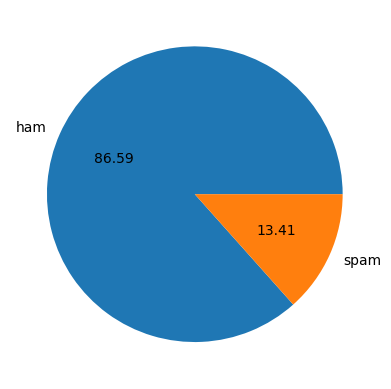

In [14]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
# df.isnull().sum()
df = df.drop_duplicates(keep = 'first')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5157 non-null   int32 
 1   Message  5157 non-null   object
dtypes: int32(1), object(1)
memory usage: 100.7+ KB


In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['m_num_char'] = df['Message'].apply(len)
df['m_num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df['m_num_sents'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df[['m_num_char','m_num_words','m_num_sents']].describe()

,m_num_char,m_num_words,m_num_sents
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
#ham
df[df['target']==0][['m_num_char','m_num_words','m_num_sents']].describe()

,m_num_char,m_num_words,m_num_sents
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#spam
df[df['target']==1][['m_num_char','m_num_words','m_num_sents']].describe()

,m_num_char,m_num_words,m_num_sents
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [25]:
import seaborn as sns


<Axes: xlabel='m_num_char', ylabel='Count'>

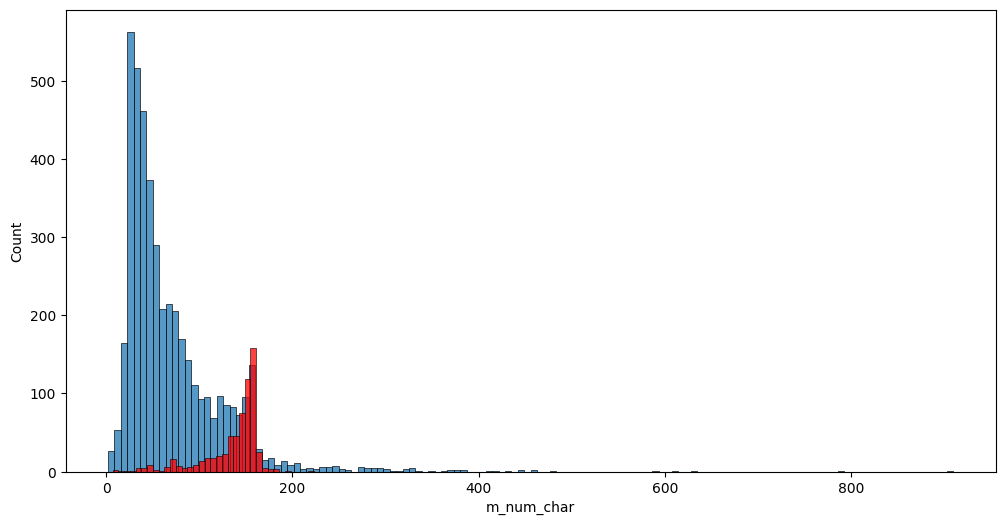

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['m_num_char'])
sns.histplot(df[df['target']==1]['m_num_char'],color='red')

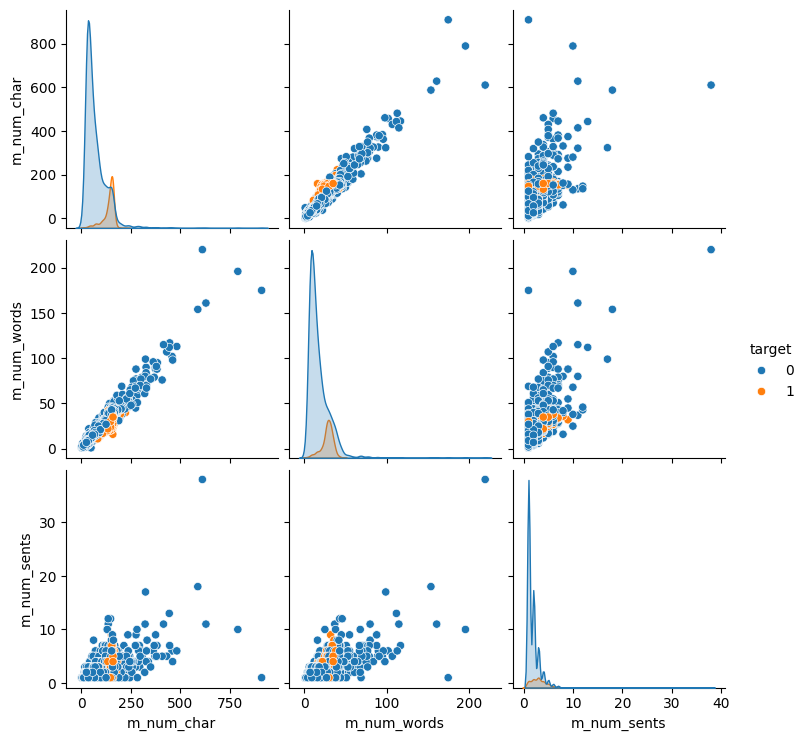

In [29]:
sns.pairplot(df,hue="target")

In [32]:
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
    
  return " ".join(y)

In [34]:
df['transformed_Message'] = df['Message'].apply(transform_text)

In [35]:
df.head()

,target,Message,m_num_char,m_num_words,m_num_sents,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
# from wordcloud import WordCloud
# wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
# wc.generate(df[df['target']==1]['transformed_Message']).str.cat(sep=" ")

In [54]:
spam_word = []
for i in df[df['target']==1]['transformed_Message'].tolist():
  for word in i.split():
    spam_word.append(word)

In [56]:
len(spam_word)

9781

In [84]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [85]:
X = tfidf.fit_transform(df['transformed_Message']).toarray()

In [88]:
X.shape

(5157, 6781)

In [89]:
Y = df['target'].values

In [94]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [95]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8662790697674418
[[1172  179]
 [  28  169]]
0.48563218390804597


In [96]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9573643410852714
[[1351    0]
 [  66  131]]
1.0


In [97]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9722222222222222
[[1348    3]
 [  40  157]]
0.98125


In [98]:
import pickle

In [99]:
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))


In [100]:
df.head()

,target,Message,m_num_char,m_num_words,m_num_sents,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [1]:
a = df['Message'][15]
print(a)

NameError: name 'df' is not defined